Day 7 - Ornstein-Uhlenbeck process (simple continuous time model for the mean reversion)

Running OU simulation


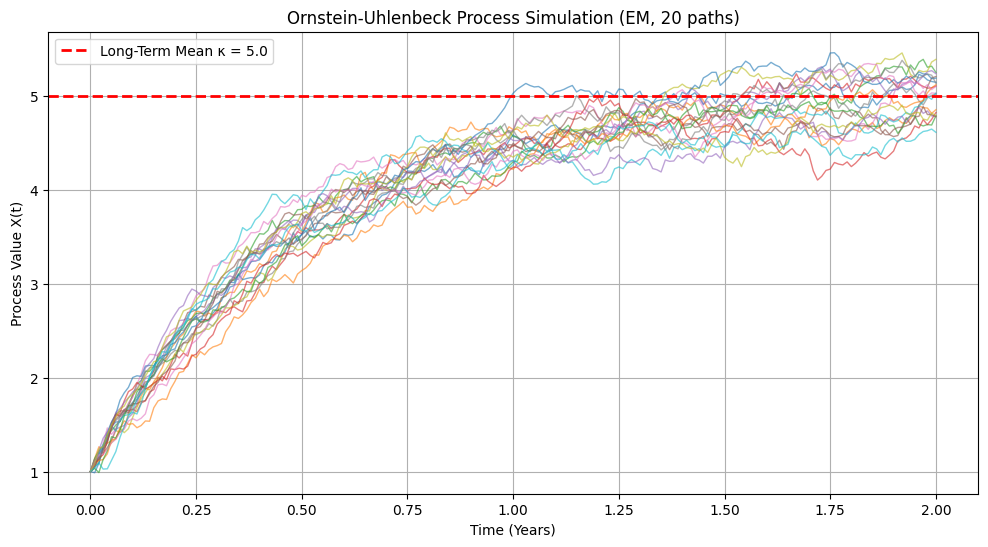

Analytical E[X(T)]   = 4.9267
Analytical StdDev[X(T)] = 0.2500
Simulated Mean X(T)    = 4.9363
Simulated StdDev X(T)  = 0.2428


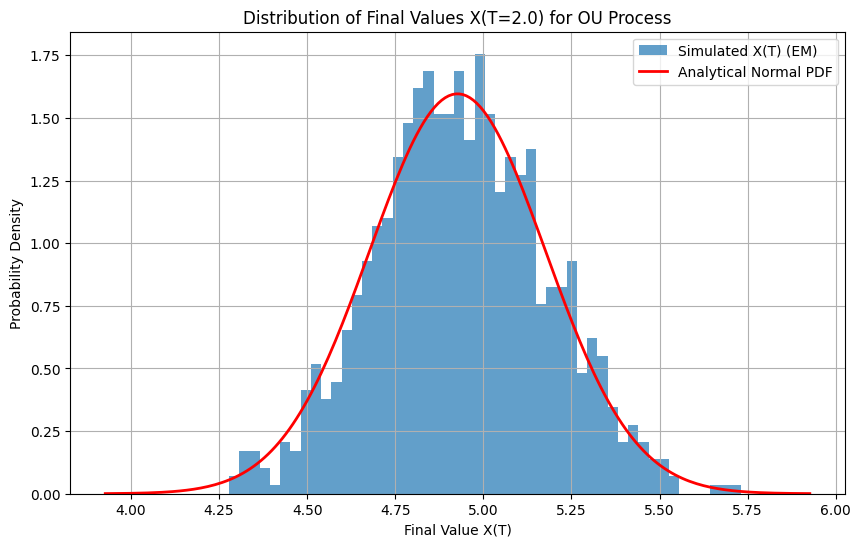

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys, os
import time

notebook_dir = os.path.dirname(os.path.abspath("__file__")) 
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

from sde_simulator.simulators import simulate_ou_em_vectorized

#imports above


X0 = 1.0         #initial value
THETA = 2.0      #speed of reversion (moderate)
KAPPA = 5.0      #long-term mean
SIGMA = 0.5      #volatility
T = 2.0          #time horizon (2 years to see reversion)
DT = 0.01        #time step
NUM_PATHS = 1000 #number of paths for distribution check

print("Running OU simulation")
t_ou, X_ou_paths = simulate_ou_em_vectorized(X0, THETA, KAPPA, SIGMA, T, DT, NUM_PATHS)

plt.figure(figsize=(12, 6))
#first 20 paths
num_paths_to_plot = min(20, NUM_PATHS) 
plt.plot(t_ou, X_ou_paths[:, :num_paths_to_plot], lw=1, alpha=0.6)
#highlight the mean level kappa
plt.axhline(KAPPA, color='red', linestyle='--', lw=2, label=f'Long-Term Mean κ = {KAPPA}')
plt.title(f'Ornstein-Uhlenbeck Process Simulation (EM, {num_paths_to_plot} paths)')
plt.xlabel('Time (Years)')
plt.ylabel('Process Value X(t)')
plt.legend()
plt.grid(True)
plt.show()

#Compare Final Distribution to Analytical
X_T_sim = X_ou_paths[-1, :]

#analytical mean and variance calculation
mean_analytical = X0 * np.exp(-THETA * T) + KAPPA * (1 - np.exp(-THETA * T))
var_analytical = (SIGMA**2 / (2 * THETA)) * (1 - np.exp(-2 * THETA * T))
stdev_analytical = np.sqrt(var_analytical)

print(f"Analytical E[X(T)]   = {mean_analytical:.4f}")
print(f"Analytical StdDev[X(T)] = {stdev_analytical:.4f}")
print(f"Simulated Mean X(T)    = {np.mean(X_T_sim):.4f}")
print(f"Simulated StdDev X(T)  = {np.std(X_T_sim):.4f}")


#histogram and analytical PDF
plt.figure(figsize=(10, 6))
plt.hist(X_T_sim, bins=50, density=True, alpha=0.7, label='Simulated X(T) (EM)')

#generate points for PDF curve
x_min = min(mean_analytical - 4*stdev_analytical, X_T_sim.min())
x_max = max(mean_analytical + 4*stdev_analytical, X_T_sim.max())
x_values = np.linspace(x_min, x_max, 200)

#calculate analytical Normal PDF
pdf_analytical = norm.pdf(x_values, loc=mean_analytical, scale=stdev_analytical)

plt.plot(x_values, pdf_analytical, 'r-', lw=2, label='Analytical Normal PDF')
plt.title(f'Distribution of Final Values X(T={T}) for OU Process')
plt.xlabel('Final Value X(T)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()